In [65]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt


In [66]:
gr1=[139,184,85,112,134,121]
gr2=[137,175,94,103,142,101]
Frame = pd.DataFrame({
    "gr1":gr1,
    "gr2":gr2
})
print(len(gr1))

6


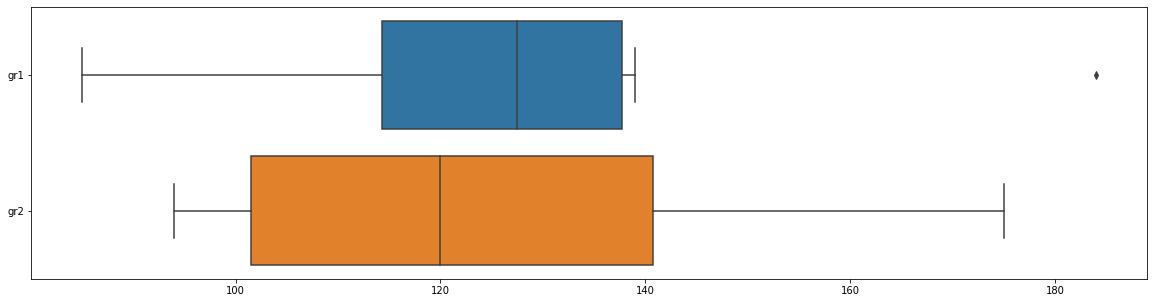

In [67]:
plt.subplots(figsize=(20,5))
sns.boxplot(orient = "h",data = Frame)

In [68]:
def sd(arr,k):
    suma = 0
    mean = (sum(arr)) / k
    
    for i in range (k):
        suma += ((arr[i] - mean))**2
        
    return suma / (k- 1)


In [69]:
def liv(a,b):
    s1=sd(a,len(a))
    s2=sd(b,len(b))
    if s1>s2:
        livCriteria=s1/s2
    else:
        livCriteria=s2/s1
    print('F = ' + str(livCriteria))
    print('df1 = ' + str(len(a)-1))
    print("df2 = " + str(len(b)-1))
    criticalLivCriteria = pd.read_excel("Таблиця критичних значень для критерію Лівеня.xlsx").iloc[len(a)-1,len(b)-1]
    print("Critical F(from table)=" + str(criticalLivCriteria))
    if livCriteria<criticalLivCriteria:
        return "insignificant"
    else:
        return "significant"

    

In [70]:
liv(gr1,gr2)

F = 1.0980148048452223
df1 = 5
df2 = 5
Critical F(from table)=5.05


'insignificant'

In [73]:
def Tcrit(a,b,flag):
    if flag=="significant":
        s1=sd(a,len(a))
        s2=sd(b,len(b))
        m1=sum(a)/len(a)
        m2=sum(b)/len(a)
        Tcrit=len(a)+len(b)-2
        t=(abs(m1-m2))/(sqrt((s1/len(a))+(s2/len(b))))
    if flag=="insignificant":
        s1=sd(a,len(a))
        s2=sd(b,len(b))
        m1=sum(a)/len(a)
        m2=sum(b)/len(a)
        df1=len(a)-1
        df2=len(b)-1
        df=len(a)+len(b)-2
        k=(1/len(a))+(1/len(b))
        t=(abs(m1-m2))/(sqrt(((df1*s1+df2*s2)/df)*k))
    else:
        return "wrong flag inp"
    print('t = ' + str(t),'\t df = ' + str(df))
    tableCrit = pd.read_excel("Таблиця критичних значень для критерію Стьюдента.xlsx").iloc[df-1,1]
    print("Critical Student's criteria = " + str(tableCrit))
    if t<tableCrit:
        return"significant"
    else:
        return"insignificant"

In [74]:
Tcrit(gr1,gr2,"insignificant")

t = 0.20596060618987902 	 df = 10
Critical student criteria = 2.228


'significant'